In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset using Pandas
df = pd.read_csv('avocado.csv')
print(df.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [5]:
# Map the "type" column to numerical values (0 for conventional, 1 for organic)
df['type'] = df['type'].map({'conventional': 0, 'organic': 1})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int64  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB
None


In [6]:
# Convert categorical "region" column to dummy variables
region_dummies = pd.get_dummies(df['region'], prefix='region', drop_first=True)
df = pd.concat([df, region_dummies], axis=1)
print(df.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  ...  region_SouthCarolina  \
0   48.16     8696.87     8603.62       93.25  ...                 False   
1   58.33     9505.56     9408.07       97.49  ...                 False   
2  130.50     8145.35     8042.21      103.14  ...                 False   
3   72.58     5811.16     5677.40      133.76  ...                 False   
4   75.78     6183.95     5986.26      197.69  ...                 False   

   region_SouthCentral  region_Southeast region_Spokane  region_StLouis  \
0    

In [7]:
# Convert "Date" column to datetime format and extract the month
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  18249 non-null  int64         
 1   Date                        18249 non-null  datetime64[ns]
 2   AveragePrice                18249 non-null  float64       
 3   Total Volume                18249 non-null  float64       
 4   4046                        18249 non-null  float64       
 5   4225                        18249 non-null  float64       
 6   4770                        18249 non-null  float64       
 7   Total Bags                  18249 non-null  float64       
 8   Small Bags                  18249 non-null  float64       
 9   Large Bags                  18249 non-null  float64       
 10  XLarge Bags                 18249 non-null  float64       
 11  type                        18249 non-null  int64     

In [8]:
# Create "Price Momentum" as the lagged average price by region
df['Price_Momentum'] = df.groupby('region')['AveragePrice'].shift(1)
print(df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsbur

In [9]:
# Avoid division by zero when calculating ratios
df['Volume_per_Bag'] = np.where(
    df['Total Bags'] > 0,
    df['Total Volume'] / df['Total Bags'],
    0
)
df['Small_Bags_Ratio'] = np.where(
    df['Total Bags'] > 0,
    df['Small Bags'] / df['Total Bags'],
    0
)
df['Large_Bags_Ratio'] = np.where(
    df['Total Bags'] > 0,
    df['Large Bags'] / df['Total Bags'],
    0
)

In [10]:
# Aggregate volume from specific PLU codes
df['Total_PLU_Volume'] = df['4046'] + df['4225'] + df['4770']

In [11]:
# Encode seasonal features using sine and cosine transformations
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
print(df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsbur

In [12]:
# Drop the original "region" column as it has been encoded
df.drop('region', axis=1, inplace=True)

In [13]:
# Feature list for the model
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 
           'Small_Bags_Ratio', 'Large_Bags_Ratio', 'type', 
           'year', 'month_sin', 'month_cos', 'Volume_per_Bag',
           'Total_PLU_Volume', 'Price_Momentum'] + list(region_dummies.columns)

In [14]:
# Fill missing values
df = df.ffill()

In [17]:
print(len(df.columns))

74


In [18]:
# Compute the correlation matrix
correlation_matrix = df[features].corr()

# Identify pairs of features with high correlation (> 0.8)
high_corr_features = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_features = [(features[x], features[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

# Remove one feature from each highly correlated pair
features_to_remove = set()
for feat1, feat2 in high_corr_features:
    features_to_remove.add(feat2)

# Final feature selection
selected_features = [f for f in features if f not in features_to_remove]
print(len(df.columns))

74


In [18]:
# Prepare the dataset
X = df[selected_features]
y = df['AveragePrice']

# Fill missing values in feature set
X = X.ffill().bfill().fillna(0)

# Scale the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [43]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the SVR model
model = SVR(
    kernel='rbf',     # Radial basis function kernel
    C=100,           # Regularization parameter
    epsilon=0.01,     # Epsilon in the epsilon-SVR model
    gamma='scale'    # Kernel coefficient
)
model.fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.01
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [44]:
# Define a function to calculate adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Predict target values on the test set
y_pred = model.predict(X_test)

# Calculate metrics for model evaluation
results = {}
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, len(X_test), X_test.shape[1])

results['SVR'] = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'Adjusted R2': adj_r2
}


SVR Model Metrics:
MAE: 0.0874
MSE: 0.0179
RMSE: 0.1336
R2: 0.8889
Adjusted R2: 0.8870


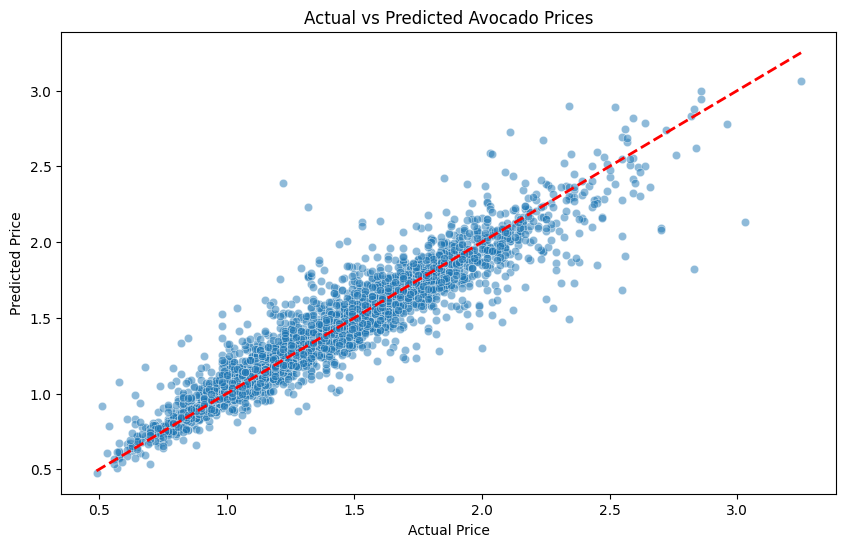

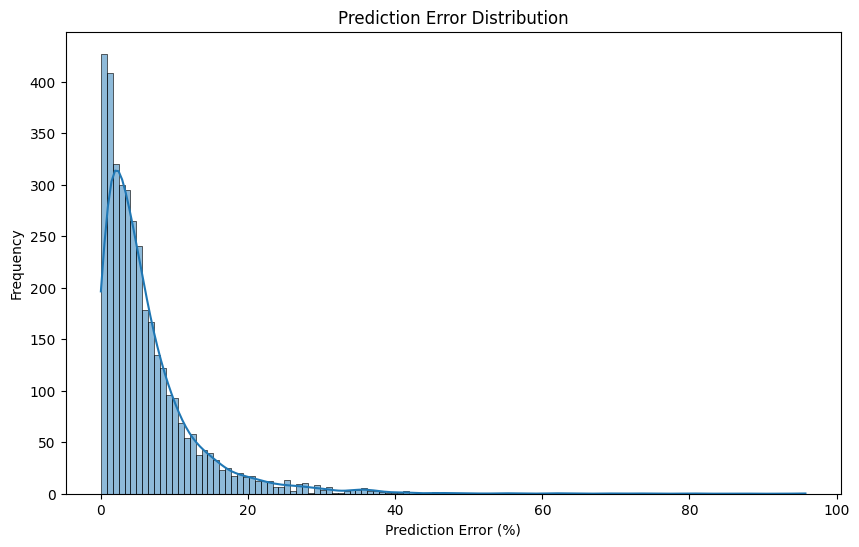

In [45]:
# Print the evaluation metrics
print("\nSVR Model Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")
print(f"Adjusted R2: {adj_r2:.4f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Avocado Prices')
plt.show()

# Visualize error distribution
plt.figure(figsize=(10, 6))
error_percentage = (abs(y_test - y_pred) / y_test) * 100
sns.histplot(error_percentage, kde=True)
plt.xlabel('Prediction Error (%)')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')
plt.show()